In [1]:
import pandas as pd
import json

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

The files we are using are from the project MTGJSON (https://mtgjson.com/), and are actively maintained, so we won't expect much in the way of missing or incorrect information.  However, the original format includes a lot of extranneous information, and we'll need to do several different transformations of datatypes and similar small formatting in order to get each dataframe into the shape that we want for Exploratory Data Analysis and, eventually, model building.  I'll be downloading individual `.json` files for each set that will be included in our analysis, so we will start by looking at what is necessary to clean one file, then create a function that will allow us to quickly and easily clean up any additional sets.


Each `.json` file is named via a three-character set abbreviation.  We'll use the Adventures in the Forgotten Realms (AFR) set to do our initial step-by-step cleaning.

In [2]:
df = pd.read_json('datasets/AFR.json', orient='index')
df

,date,version,baseSetSize,booster,cards,cardsphereSetId,code,isFoilOnly,isOnlineOnly,keyruneCode,mcmId,mcmIdExtras,mcmName,mtgoCode,name,releaseDate,sealedProduct,tcgplayerGroupId,tokens,totalSetSize,translations,type
meta,2022-06-20,5.2.0+20220620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data,NaT,NaN,281.0,{'arena': {'boosters': [{'contents': {'common'...,"[{'artist': 'Jarel Threat', 'availability': ['...",1337.0,AFR,0.0,0.0,AFR,4259.0,4260.0,Adventures in the Forgotten Realms,AFR,Adventures in the Forgotten Realms,2021-07-23,[{'identifiers': {'tcgplayerProductId': '23873...,2823.0,"[{'artist': 'Irina Nordsol', 'availability': [...",402.0,{},expansion


The initial dataframe consists of only two rows, "meta" and "data."  All of the data that we're currently interested in can be found in the cards column of the data row, so we will extract that as its own dataframe.

In [3]:
df = pd.DataFrame(df.cards[1])

In [4]:
df.head()

,artist,availability,boosterTypes,borderColor,colorIdentity,colors,convertedManaCost,edhrecRank,finishes,flavorText,foreignData,frameVersion,hasFoil,hasNonFoil,identifiers,keywords,language,layout,legalities,manaCost,manaValue,name,number,printings,purchaseUrls,rarity,rulings,setCode,subtypes,supertypes,text,type,types,uuid,power,toughness,variations,frameEffects,securityStamp,rebalancedPrintings,isAlternative,isOnlineOnly,isRebalanced,isStarter,originalPrintings,leadershipSkills,loyalty,isReprint,promoTypes,isPromo,watermark
0,Jarel Threat,"[arena, mtgo, paper]",[draft],black,[W],[W],2.0,11959.0,"[nonfoil, foil]",The weight of this magic weapon falls heavy on...,[],2015,True,True,"{'cardKingdomFoilId': '248423', 'cardKingdomId...",[Equip],English,normal,"{'alchemy': 'Legal', 'brawl': 'Legal', 'comman...",{1}{W},2.0,+2 Mace,1,[AFR],{'cardKingdom': 'https://mtgjson.com/links/246...,common,[],AFR,[Equipment],[],Equipped creature gets +2/+2.\nEquip {3} ({3}:...,Artifact — Equipment,[Artifact],84d2e61d-46ef-5fa7-aeff-7a4cd8db71c8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Justyna Gil,"[arena, mtgo, paper]",[draft],black,[W],[W],4.0,16970.0,"[nonfoil, foil]",The noble steeds of the elven gods can sometim...,[{'flavorText': 'Die edlen Reittiere der elfis...,2015,True,True,"{'cardKingdomFoilId': '248542', 'cardKingdomId...",[Flying],English,normal,"{'alchemy': 'Legal', 'brawl': 'Legal', 'comman...",{3}{W},4.0,Arborea Pegasus,2,[AFR],{'cardKingdom': 'https://mtgjson.com/links/d46...,common,[],AFR,[Pegasus],[],Flying\nWhen Arborea Pegasus enters the battle...,Creature — Pegasus,[Creature],6d3bc1d2-45a5-5010-b36b-6cc33c962d33,2,3,[245a7947-877e-5b5d-b523-69bdf17a0950],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oriana Menendez,"[arena, mtgo, paper]",[draft],black,[W],[W],3.0,12876.0,"[nonfoil, foil]",Blink dogs protect the wild places of the worl...,[{'flavorText': 'Flimmerhunde beschützen die w...,2015,True,True,"{'cardKingdomFoilId': '248564', 'cardKingdomId...",[Double strike],English,normal,"{'alchemy': 'Legal', 'brawl': 'Legal', 'comman...",{2}{W},3.0,Blink Dog,3,[AFR],{'cardKingdom': 'https://mtgjson.com/links/d18...,uncommon,"[{'date': '2021-07-23', 'text': 'Phased out pe...",AFR,[Dog],[],Double strike\nTeleport — {3}{W}: Blink Dog ph...,Creature — Dog,[Creature],567a3bb4-1ad0-529f-9e0b-fe882f560c93,1,1,[196318b1-4d1a-5f41-a024-256e63c89a55],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daniel Ljunggren,"[arena, mtgo, paper]",[draft],black,[W],[W],3.0,3378.0,"[nonfoil, foil]",NaN,"[{'language': 'German', 'multiverseId': 527551...",2015,True,True,"{'cardKingdomFoilId': '248511', 'cardKingdomId...",NaN,English,normal,"{'alchemy': 'Legal', 'brawl': 'Legal', 'comman...",{W}{W}{W},3.0,The Book of Exalted Deeds,4,"[AFR, PAFR]",{'cardKingdom': 'https://mtgjson.com/links/eba...,mythic,"[{'date': '2021-07-23', 'text': 'The enlighten...",AFR,[],[Legendary],"At the beginning of your end step, if you gain...",Legendary Artifact,[Artifact],e5465719-ba59-52ef-b475-f553e6fc57f9,NaN,NaN,[5031765f-0bd8-5866-89ac-2e9a3ec1b7e7],[legendary],oval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Johannes Voss,"[arena, mtgo, paper]",[draft],black,[W],[W],3.0,7131.0,"[nonfoil, foil]","When all hope fails, its light remains.","[{'flavorText': 'Wenn alle Hoffnung schwindet,...",2015,True,True,"{'cardKingdomFoilId': '248369', 'cardKingdomId...",NaN,English,normal,"{'alchemy': 'Legal', 'brawl': 'Legal', 'comman...",{2}{W},3.0,Celestial Unicorn,5,[AFR],{'cardKingdom': 'https://mtgjson.com/links/7c6...,common,"[{'date': '2021-07-23', 'text': 'If you gain l...",AFR,[Unicorn],[],"Whenever you gain life, put a +1/+1 counter on...",Creature — Unicorn,[Creature],c228e9d4-2a6c-5f5c-bf27-93b3a8bd0852,3,2,[80a6282b-7e49-583e-b725-7d0d4ba8a13d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(420, 51)

In [6]:
df.columns

Index(['artist', 'availability', 'boosterTypes', 'borderColor',
       'colorIdentity', 'colors', 'convertedManaCost', 'edhrecRank',
       'finishes', 'flavorText', 'foreignData', 'frameVersion', 'hasFoil',
       'hasNonFoil', 'identifiers', 'keywords', 'language', 'layout',
       'legalities', 'manaCost', 'manaValue', 'name', 'number', 'printings',
       'purchaseUrls', 'rarity', 'rulings', 'setCode', 'subtypes',
       'supertypes', 'text', 'type', 'types', 'uuid', 'power', 'toughness',
       'variations', 'frameEffects', 'securityStamp', 'rebalancedPrintings',
       'isAlternative', 'isOnlineOnly', 'isRebalanced', 'isStarter',
       'originalPrintings', 'leadershipSkills', 'loyalty', 'isReprint',
       'promoTypes', 'isPromo', 'watermark'],
      dtype='object')

We can see from our row count that we have 420 different cards represented, however a quick reference of the List of MTG Sets article on Wikipedia (https://en.wikipedia.org/wiki/List_of_Magic:_The_Gathering_sets#Expansion_sets) tells us we should expect to see only 281 cards.  The MTGJSON files include separate entries for promotional versions of cards with alternate art as well as digital-only versions of cards that won't be important to our analysis, so we'll drop these from the list.

In [7]:
df = df[df['promoTypes'].isnull()]
df.shape

(299, 51)

In [8]:
df = df.loc[df['securityStamp'] != 'arena']
df.shape

(281, 51)

281 cards is exactly what we expect to see, so now we will drop the Basic Lands from the dataset.  Every expansion includes the five basic land cards that are necessary to play the game, but they are in and of themselves irrelevant to any analysis that we plan to do, so we can drop them from each of the sets that we include in our analysis.

In [9]:
df = df.loc[~df['supertypes'].map(lambda x: bool('Basic' in x))]
df.shape

(261, 51)

The MTGJSON files include a wealth of information about each card, most of which will not be germaine to this specific analysis, so we choose a number that should be relevant, and drop the rest.

In [10]:
df = df.loc[:, ['name', 'colors', 'manaValue', 'manaCost', 'power', 'toughness', 
                    'loyalty', 'text', 'rarity', 'keywords', 'supertypes', 'types']]

In [11]:
df.head(10)

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types
0,+2 Mace,[W],2.0,{1}{W},NaN,NaN,NaN,Equipped creature gets +2/+2.\nEquip {3} ({3}:...,common,[Equip],[],[Artifact]
1,Arborea Pegasus,[W],4.0,{3}{W},2,3,NaN,Flying\nWhen Arborea Pegasus enters the battle...,common,[Flying],[],[Creature]
2,Blink Dog,[W],3.0,{2}{W},1,1,NaN,Double strike\nTeleport — {3}{W}: Blink Dog ph...,uncommon,[Double strike],[],[Creature]
3,The Book of Exalted Deeds,[W],3.0,{W}{W}{W},NaN,NaN,NaN,"At the beginning of your end step, if you gain...",mythic,NaN,[Legendary],[Artifact]
4,Celestial Unicorn,[W],3.0,{2}{W},3,2,NaN,"Whenever you gain life, put a +1/+1 counter on...",common,NaN,[],[Creature]
5,Cleric Class,[W],1.0,{W},NaN,NaN,NaN,(Gain the next level as a sorcery to add its a...,uncommon,NaN,[],[Enchantment]
6,Cloister Gargoyle,[W],3.0,{2}{W},0,4,NaN,"When Cloister Gargoyle enters the battlefield,...",uncommon,[Venture into the dungeon],[],"[Artifact, Creature]"
8,Dancing Sword,[W],2.0,{1}{W},NaN,NaN,NaN,Equipped creature gets +2/+1.\nWhen equipped c...,rare,[Equip],[],[Artifact]
9,Dawnbringer Cleric,[W],2.0,{1}{W},1,3,NaN,When Dawnbringer Cleric enters the battlefield...,common,NaN,[],[Creature]
10,Delver's Torch,[W],2.0,{1}{W},NaN,NaN,NaN,Equipped creature gets +1/+1.\nWhenever equipp...,common,"[Equip, Venture into the dungeon]",[],[Artifact]


Several columns of information that will be important to us are formatted as lists, which makes getting to the information with Pandas a bit tricky, so we're going to convert them from lists to strings.  We'll do this for the columns "colors", "keywords", "supertypes", and "types".  Unfortunately, the keywords column has NaN values instead of empty lists if the card has no keywords, so we'll first replace those NaNs with empty strings.

In [12]:
df['keywords'].fillna('', inplace=True)
to_unlist = ['colors', 'types', 'supertypes', 'keywords']
for column in to_unlist:
    df[column] = [', '.join(map(str, l)) for l in df[column]]

In [13]:
df.head(10)

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types
0,+2 Mace,W,2.0,{1}{W},NaN,NaN,NaN,Equipped creature gets +2/+2.\nEquip {3} ({3}:...,common,Equip,,Artifact
1,Arborea Pegasus,W,4.0,{3}{W},2,3,NaN,Flying\nWhen Arborea Pegasus enters the battle...,common,Flying,,Creature
2,Blink Dog,W,3.0,{2}{W},1,1,NaN,Double strike\nTeleport — {3}{W}: Blink Dog ph...,uncommon,Double strike,,Creature
3,The Book of Exalted Deeds,W,3.0,{W}{W}{W},NaN,NaN,NaN,"At the beginning of your end step, if you gain...",mythic,,Legendary,Artifact
4,Celestial Unicorn,W,3.0,{2}{W},3,2,NaN,"Whenever you gain life, put a +1/+1 counter on...",common,,,Creature
5,Cleric Class,W,1.0,{W},NaN,NaN,NaN,(Gain the next level as a sorcery to add its a...,uncommon,,,Enchantment
6,Cloister Gargoyle,W,3.0,{2}{W},0,4,NaN,"When Cloister Gargoyle enters the battlefield,...",uncommon,Venture into the dungeon,,"Artifact, Creature"
8,Dancing Sword,W,2.0,{1}{W},NaN,NaN,NaN,Equipped creature gets +2/+1.\nWhen equipped c...,rare,Equip,,Artifact
9,Dawnbringer Cleric,W,2.0,{1}{W},1,3,NaN,When Dawnbringer Cleric enters the battlefield...,common,,,Creature
10,Delver's Torch,W,2.0,{1}{W},NaN,NaN,NaN,Equipped creature gets +1/+1.\nWhenever equipp...,common,"Equip, Venture into the dungeon",,Artifact


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 278
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        261 non-null    object 
 1   colors      261 non-null    object 
 2   manaValue   261 non-null    float64
 3   manaCost    252 non-null    object 
 4   power       142 non-null    object 
 5   toughness   142 non-null    object 
 6   loyalty     5 non-null      object 
 7   text        261 non-null    object 
 8   rarity      261 non-null    object 
 9   keywords    261 non-null    object 
 10  supertypes  261 non-null    object 
 11  types       261 non-null    object 
dtypes: float64(1), object(11)
memory usage: 26.5+ KB


We can see that there are four numeric columns that will likely interest us:  manaValue, power, toughness & loyalty.  However, the latter three are currently formatted as strings, so we will fix that. There is the possibility that values in these lists may include the value '*', indicating that they value is variable.  For simplicity's sake, we will use `errors='coerce'` to replace the variable power indicator with NaN.

In [15]:
to_convert = ['power', 'toughness', 'loyalty']
for column in to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

We've removed some items from the set, so we'll go ahead and reset the index numbers.

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        261 non-null    object 
 1   colors      261 non-null    object 
 2   manaValue   261 non-null    float64
 3   manaCost    252 non-null    object 
 4   power       142 non-null    float64
 5   toughness   142 non-null    float64
 6   loyalty     5 non-null      float64
 7   text        261 non-null    object 
 8   rarity      261 non-null    object 
 9   keywords    261 non-null    object 
 10  supertypes  261 non-null    object 
 11  types       261 non-null    object 
dtypes: float64(4), object(8)
memory usage: 24.6+ KB


This looks like a good place to start from, so we'll create a function that includes all of these steps.  We can then put each of the individual sets that we want to clean in a list and iterate over it with the function to give us a list of dataframes, which we can then write out to `.csv` format to give us a number of cleaned individual datasets that are identically formatted, which will allow us to easily combine them.

#### Handling Modal Cards

Many cards in the sets that we are considering are modal in nature, meaning that a single card can be played in one of two distinct ways.  In the MTGJSON datasets, each mode of a single card has its own row, but both rows have the same name in the format "MODE 1 // MODE 2". For the sake of this analysis, we will treat each mode of such a card as its own card. We will add a function to be called within our cleaning function that will rename each of these entries to reflect the name of casting that specific mode.

In [18]:
def drop_modal_names (df):
    if 'faceName' in df.columns:
        df['faceName'].fillna(df['name'], inplace=True)
        df.drop(['name'], inplace=True, axis=1)
        df.rename(columns={'faceName':'name'}, inplace=True)

In [19]:
def initial_cleaning (json_file):
    df = pd.read_json(json_file, orient='index')
    df = pd.DataFrame(df.cards[1])
    
    # Removing promos, online only cards, basic lands.    
    if 'promoTypes' in df.columns:
        df = df[df['promoTypes'].isnull()]
    df = df.loc[df['securityStamp'] != 'arena']
    df = df.loc[~df['supertypes'].map(lambda x: bool('Basic' in x))]
    
    # Renaming modal cards
    drop_modal_names(df)
    
    # Choosing the columns we want to keep.
    df = df.loc[:, ['name', 'colors', 'manaValue', 'manaCost', 'power', 'toughness', 
                    'loyalty', 'text', 'rarity', 'keywords', 'supertypes', 'types']]
    
    # Resetting the index before we do anything else.
    df.reset_index(drop=True, inplace=True)
    
    # Changing list values to string values
    to_unlist = ['colors', 'types', 'supertypes', 'keywords']
    df['keywords'].fillna('', inplace=True)
    for column in to_unlist:
        df[column] = [', '.join(map(str, l)) for l in df[column]]
    
    # Converting numeric columns to numeric datatypes
    to_convert = ['power', 'toughness', 'loyalty']
    for column in to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce') 

    # Just in case we missed any duplicated entries with our initial cleaning steps, we drop them here and
    # reset the index one last time.
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [20]:
files = ['AER', 'AFR', 'AKH', 'BFZ', 'DOM', 'ELD', 'EMN', 'GRN', 'HOU', 'IKO', 'KHM', 'KLD', 'MID', 'M19', 'M20', 'M21',
         'NEO', 'OGW', 'RIX', 'RNA', 'SNC', 'SOI', 'STX', 'THB', 'VOW', 'WAR', 'XLN', 'ZNR']
dfs = []

In [21]:
len(files)

28

In [22]:
for f in files:
    dfs.append(initial_cleaning('datasets/'+f+'.json'))

In [23]:
for df, f in zip(dfs, files):
    df.to_csv('cleaned_datasets/'+f+'_cleaned.csv')

With our individual sets cleaned and exported, we'll now merge them all in to a single dataframe, using the `reduce()` function.

In [24]:
from functools import reduce

In [25]:
df_merged = reduce(lambda left,right: pd.merge(left, right, how='outer'), dfs)

In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7147 entries, 0 to 7146
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7147 non-null   object 
 1   colors      7147 non-null   object 
 2   manaValue   7147 non-null   float64
 3   manaCost    6629 non-null   object 
 4   power       3868 non-null   float64
 5   toughness   3878 non-null   float64
 6   loyalty     168 non-null    float64
 7   text        7047 non-null   object 
 8   rarity      7147 non-null   object 
 9   keywords    7147 non-null   object 
 10  supertypes  7147 non-null   object 
 11  types       7147 non-null   object 
dtypes: float64(4), object(8)
memory usage: 725.9+ KB


We check for any cards that are have identical names.  A handful pop up, and the reason for this is that they are cards that have been reprinted at later times with a different rarity value than their earlier printing.  The number of cards this applies to is fairly small, so we'll just drop the duplicates, keeping the first occurrence of that particular card.

In [27]:
df_merged[df_merged.duplicated(subset= 'name', keep=False)]

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types
188,Tranquil Expanse,,0.0,NaN,NaN,NaN,NaN,Tranquil Expanse enters the battlefield tapped...,common,,,Land
193,Submerged Boneyard,,0.0,NaN,NaN,NaN,NaN,Submerged Boneyard enters the battlefield tapp...,common,,,Land
433,Bag of Holding,,1.0,{1},NaN,NaN,NaN,"Whenever you discard a card, exile that card f...",uncommon,,,Artifact
621,Gift of Paradise,G,3.0,{2}{G},NaN,NaN,NaN,Enchant land\nWhen Gift of Paradise enters the...,common,Enchant,,Enchantment
722,Stone Quarry,,0.0,NaN,NaN,NaN,NaN,Stone Quarry enters the battlefield tapped.\n{...,common,,,Land
727,Foul Orchard,,0.0,NaN,NaN,NaN,NaN,Foul Orchard enters the battlefield tapped.\n{...,common,,,Land
728,Cinder Barrens,,0.0,NaN,NaN,NaN,NaN,Cinder Barrens enters the battlefield tapped.\...,common,,,Land
729,Forsaken Sanctuary,,0.0,NaN,NaN,NaN,NaN,Forsaken Sanctuary enters the battlefield tapp...,common,,,Land
730,Highland Lake,,0.0,NaN,NaN,NaN,NaN,Highland Lake enters the battlefield tapped.\n...,common,,,Land
731,Meandering River,,0.0,NaN,NaN,NaN,NaN,Meandering River enters the battlefield tapped...,common,,,Land


In [28]:
df_merged.drop_duplicates(subset='name', keep='first', inplace=True)

In [29]:
df_merged[df_merged.duplicated(subset= 'name', keep=False)]

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types


In [30]:
df_merged.shape

(7125, 12)

In [40]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7125 non-null   object 
 1   colors      7125 non-null   object 
 2   manaValue   7125 non-null   float64
 3   manaCost    6617 non-null   object 
 4   power       3867 non-null   float64
 5   toughness   3877 non-null   float64
 6   loyalty     168 non-null    float64
 7   text        7025 non-null   object 
 8   rarity      7125 non-null   object 
 9   keywords    7125 non-null   object 
 10  supertypes  7125 non-null   object 
 11  types       7125 non-null   object 
dtypes: float64(4), object(8)
memory usage: 668.1+ KB


In [39]:
df_merged.reset_index(drop=True, inplace=True)

In [35]:
df_merged.head()

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types
0,Aerial Modification,W,5.0,{4}{W},NaN,NaN,NaN,Enchant creature or Vehicle\nAs long as enchan...,uncommon,Enchant,,Enchantment
1,Aeronaut Admiral,W,4.0,{3}{W},3.0,1.0,NaN,Flying\nVehicles you control have flying.,uncommon,Flying,,Creature
2,Aether Inspector,W,4.0,{3}{W},2.0,3.0,NaN,Vigilance\nWhen Aether Inspector enters the ba...,common,Vigilance,,Creature
3,Aethergeode Miner,W,2.0,{1}{W},3.0,1.0,NaN,"Whenever Aethergeode Miner attacks, you get {E...",rare,,,Creature
4,Airdrop Aeronauts,W,5.0,{3}{W}{W},4.0,3.0,NaN,Flying\nRevolt — When Airdrop Aeronauts enters...,uncommon,"Flying, Revolt",,Creature


In [41]:
df_merged.to_csv('cleaned_datasets/allsets_cleaned.csv')

We now have a relatively clean dataset for each of the 28 sets that we're considering for this analysis, as well a master dataframe that consists of a little over 7,000 cards.  We can now comfortably move on to transforming the data that we want to include in our machine learning models.

In [33]:
import seaborn as sns

<AxesSubplot:>

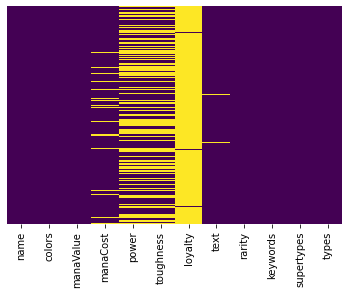

In [34]:
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')